*   Nama dataset: Financial Data (Standard & Poor’s 500) companies.
*   Tanggal pembuatan: 2021
*   Sumber data: Kaggle
*   Format data: CSV



In [ ]:
# Skema data

import pandas as pd

def load_data(file_path, sep=';'):
    # Load the dataset
    data = pd.read_csv("takel.csv", sep=sep)
    return data

def check_column_types(file_path, sep=';'):
    # Load the dataset
    data = load_data("takel.csv", sep=sep)
    return data.dtypes

# Define the separator
separator = ';'

# Load data and print its head
data = load_data("takel.csv", sep=separator)
print("Data Preview:")
print(data.head().to_string(index=False))

# Check and print column types
print("\nColumn Types:")
column_types = check_column_types("takel.csv", sep=separator)
print(column_types)

Data Preview:
 No       date firm Ticker  Research Development  Income Before Tax   Net Income  Selling General Administrative  Gross Profit         Ebit  Operating Income  Interest Expense  Income Tax Expense  Total Revenue  Total Operating Expenses  Cost Of Revenue  Total Other Income Expense Net  Net Income From Continuing Ops  Net Income Applicable To Common Shares
  0 30/09/2021   3M    MMM           482000000.0       1761000000.0 1434000000.0                    1739000000.0  4089000000.0 1868000000.0      1868000000.0      -117000000.0         324000000.0   8942000000.0              7074000000.0     4853000000.0                    -107000000.0                    1437000000.0                            1434000000.0
  1 30/06/2021   3M    MMM           514000000.0       1940000000.0 1524000000.0                    1666000000.0  4231000000.0 2051000000.0      2051000000.0      -121000000.0         415000000.0   8950000000.0              6899000000.0     4719000000.0                 

Apakah tipe data konsisten (numerik, teks, dll.)?
Tipe data pada dataset terlihat konsisten secara umum, di mana kolom-kolom numerik seperti Research Development, Net Income, dan Total Revenue menggunakan tipe float64 atau int64, sesuai dengan data keuangan yang berupa angka. Sementara itu, kolom seperti firm dan Ticker menggunakan tipe object, yang tepat untuk data teks, dan kolom date, meskipun bertipe object, kemungkinan menyimpan data tanggal yang dapat dikonversi ke tipe datetime untuk analisis yang lebih akurat. Namun, perlu dilakukan pengecekan lebih lanjut untuk memastikan tidak ada nilai yang tidak sesuai, seperti nilai kosong (NaN) pada dataset. Jika semua data telah diperiksa dan dikonfirmasi konsisten, dataset ini sudah siap untuk digunakan dalam analisis lebih lanjut.

In [ ]:
# Cek missing values

def check_missing_values(data):
    return data.isnull().sum()

# Check for missing values
print("\nMissing Values:")
missing_values = check_missing_values(data)
print(missing_values)


Missing Values:
No                                           0
date                                         0
firm                                         0
Ticker                                       0
Research Development                      1378
Income Before Tax                            1
Net Income                                   0
Selling General Administrative              60
Gross Profit                                 0
Ebit                                         0
Operating Income                             1
Interest Expense                           182
Income Tax Expense                           0
Total Revenue                                0
Total Operating Expenses                     0
Cost Of Revenue                              0
Total Other Income Expense Net               0
Net Income From Continuing Ops               1
Net Income Applicable To Common Shares       1
dtype: int64


In [ ]:
# Handling missing values

def handle_missing_values(data, strategy='mean'):
    if strategy in ['mean', 'median']:
        # Apply strategy only to numeric columns
        numeric_data = data.select_dtypes(include=['number'])
        if strategy == 'mean':
            numeric_data = numeric_data.fillna(numeric_data.mean())
        elif strategy == 'median':
            numeric_data = numeric_data.fillna(numeric_data.median())

        # Combine with non-numeric columns
        non_numeric_data = data.select_dtypes(exclude=['number'])
        return pd.concat([numeric_data, non_numeric_data], axis=1)
    elif strategy == 'mode':
        # Fill all columns with mode (most frequent value)
        return data.fillna(data.mode().iloc[0])
    elif strategy == 'drop':
        # Drop rows with missing values
        return data.dropna()
    else:
        raise ValueError("Unsupported strategy. Choose from 'mean', 'median', 'mode', or 'drop'.")

# Handle missing values (fill with mean)
data_cleaned = handle_missing_values(data, strategy='mean')
print("\nData After Handling Missing Values:")
print(data_cleaned.head())


Data After Handling Missing Values:
   No  Research Development  Income Before Tax    Net Income  \
0   0           482000000.0       1.761000e+09  1.434000e+09   
1   1           514000000.0       1.940000e+09  1.524000e+09   
2   2           520000000.0       1.946000e+09  1.624000e+09   
3   3           449000000.0       1.706000e+09  1.389000e+09   
4   4           482000000.0       1.761000e+09  1.434000e+09   

   Selling General Administrative  Gross Profit          Ebit  \
0                    1.739000e+09  4.089000e+09  1.868000e+09   
1                    1.666000e+09  4.231000e+09  2.051000e+09   
2                    1.720000e+09  4.327000e+09  2.087000e+09   
3                    1.814000e+09  4.246000e+09  1.983000e+09   
4                    1.739000e+09  4.089000e+09  1.868000e+09   

   Operating Income  Interest Expense  Income Tax Expense  Total Revenue  \
0      1.868000e+09      -117000000.0         324000000.0   8.942000e+09   
1      2.051000e+09      -121000000

In [ ]:
# Recheck data

def verify_no_missing_values(data):
    total_missing = data.isnull().sum().sum()
    return total_missing == 0

# Verify no missing values
print("\nVerification of Missing Values:")
no_missing = verify_no_missing_values(data_cleaned)
print("No missing values remaining." if no_missing else "Missing values still exist.")


Verification of Missing Values:
No missing values remaining.


In [ ]:
# Excel baru yang bersih

def save_to_csv(data, file_name):
    data.to_csv(file_name, index=False)
    print(f"Data successfully saved to {file_name}")

# Save cleaned data to CSV
output_file = 'cleaned_data.csv'  # Specify output file name
save_to_csv(data_cleaned, output_file)

Data successfully saved to cleaned_data.csv


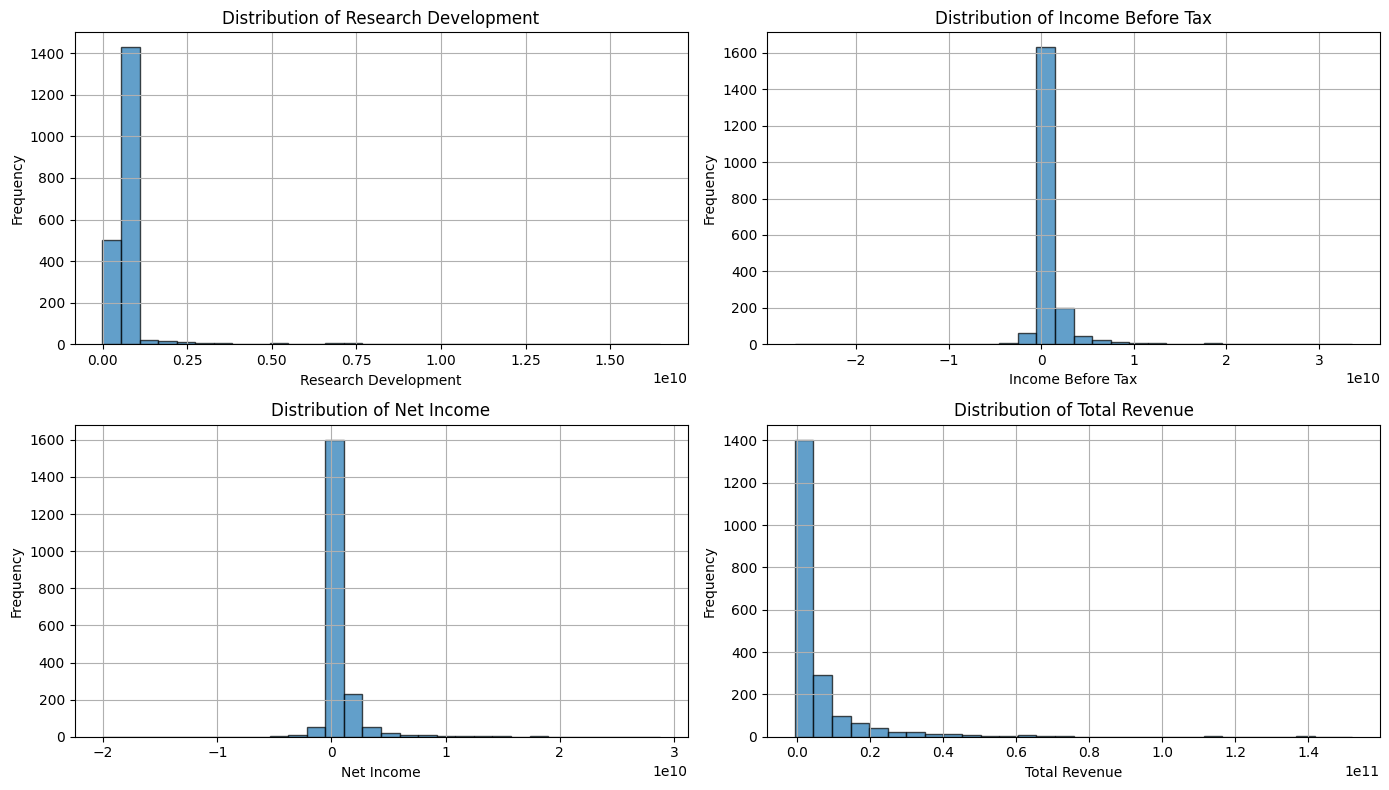

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi data
plt.figure(figsize=(14, 8))

# Plot histograms for a subset of numerical columns
columns_to_plot = ['Research Development', 'Income Before Tax', 'Net Income', 'Total Revenue']

# Check if the columns exist in the DataFrame
for col in columns_to_plot:
    if col not in data_cleaned.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

# Filter the columns to plot to include only those that exist
existing_columns = [col for col in columns_to_plot if col in data_cleaned.columns]

for i, col in enumerate(existing_columns, 1):
    plt.subplot(2, 2, i)
    data_cleaned[col].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()